# Predicting heart disease
In this notebook, my mission is to predict heart disease beforehand using decision trees and a dataset that contains the following data:
- age: The person’s age in years
- sex: The person’s sex (1 = male, 0 = female)
- cp: chest pain type— Value 0: asymptomatic— Value 1: atypical angina— Value 2: non-anginal pain— Value 3: typical angina
- trestbps: The person’s resting blood pressure (mm Hg on admission to the hospital)
- chol: The person’s cholesterol measurement in mg/dl
- fbs: The person’s fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
- restecg: resting electrocardiographic results— Value 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria— Value 1: normal— Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- thalach: The person’s maximum heart rate achieved
- exang: Exercise induced angina (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot.)
- slope: the slope of the peak exercise ST segment — 0: downsloping; 1: flat; 2: upsloping
- ca: The number of major vessels (0–3)
- thal: A blood disorder called thalassemia Value 0: NULL (dropped from the dataset previouslyValue 1: fixed defect (no blood flow in some part of the heart)Value 2: normal blood flowValue 3: reversible defect (a blood flow is observed but it is not normal)
- target: Heart disease (1 = no, 0= yes)

### Imports and setup


In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier

# Inspecting the dataset

In [25]:
# Load the dataset
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df = pd.read_csv('heart.csv')

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Our dataset is ready for use. It has no null fields and our fields are numeric so no data preprocessing is needed. 

In [27]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


As we see, the mean age is 54 which means this dataset may be biased towards older people or that heart diseases are way more common in older demographic. Also, judging by the mean, we have more people with hearth diseases than healthy dataset. 

# Exploratory Data Analysis
### Distribution

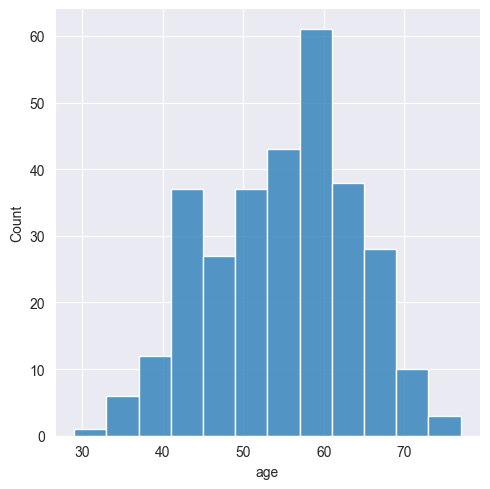

In [28]:
sns.displot(df, x='age')

To confirm our previous statement, I plotted distribution of age, and as we see, the range of ages are between 30 and 73(also seen in min, max values earlier) and the range with most entries are in 50-60 year olds.

#### Choosing features of the data set that have the highest absolute correlation with the target. 


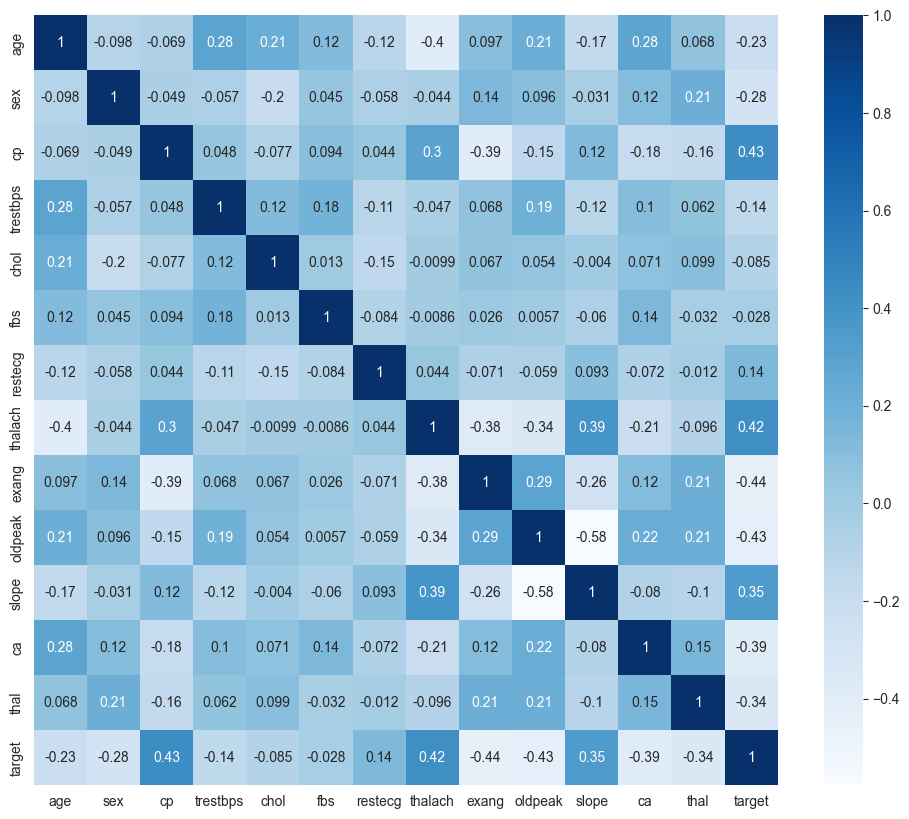

In [29]:
plt.figure(figsize=(12, 10))
correlation_table = df.corr(numeric_only=False)
sns.heatmap(correlation_table, annot=True, cmap=plt.cm.Blues)
plt.show()

As we see the most impactful features of these set are exang(-0.44), cp(0.43) and oldpeak(-0.43).

## Data preprocessing
### Spliting the data

In [30]:
# split our data
X_train, X_test, y_train, y_test = train_test_split(df[['exang', 'cp', 'oldpeak']], df['target'],
                                                    test_size=0.4,
                                                    random_state=42)

# Training Decision Tree and Random Forest models 

## Decision tree

In [31]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
dt_predicted = decision_tree.predict(X_test)

### Checking model performance

In [32]:
print(classification_report(y_test, dt_predicted))

              precision    recall  f1-score   support

           0       0.61      0.83      0.70        52
           1       0.83      0.61      0.70        70

    accuracy                           0.70       122
   macro avg       0.72      0.72      0.70       122
weighted avg       0.74      0.70      0.70       122



F1 score is 0.69 which is considered average but decent in the industry.

## Random Forest

In [33]:
random_forest = RandomForestClassifier(n_estimators=10, random_state=42)
random_forest.fit(X_train, y_train)
rf_predicted = random_forest.predict(X_test)

### Check model performance

In [34]:
print(classification_report(y_test, rf_predicted))

              precision    recall  f1-score   support

           0       0.60      0.79      0.68        52
           1       0.80      0.61      0.69        70

    accuracy                           0.69       122
   macro avg       0.70      0.70      0.69       122
weighted avg       0.71      0.69      0.69       122



We got a f1 score similar to Decision Tree model.

# Hyperparameter Tuning
## Decision tree model

In [35]:
params = {
    'max_depth': [None, 5, 10, 15, 20, 25],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'min_weight_fraction_leaf': [0.0, 0.01, 0.05],
    'max_features': ['sqrt', 'log2'],
    'max_leaf_nodes': [None, 10, 20, 30, 50, 100],
    'min_impurity_decrease': [0.0, 0.01, 0.05]
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid=params, cv=5, n_jobs=2, verbose=2)
grid.fit(X_train, y_train)
print(grid.best_score_, grid.best_params_)

Fitting 5 folds for each of 10368 candidates, totalling 51840 fits
0.7677177177177177 {'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.01, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.05}


### Getting classification report for this params

In [36]:
decision_tree = DecisionTreeClassifier(random_state=42,
                                       **{'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None,
                                          'min_impurity_decrease': 0.01, 'min_samples_leaf': 1, 'min_samples_split': 2,
                                          'min_weight_fraction_leaf': 0.05})
decision_tree.fit(X_train, y_train)
dt_predicted = decision_tree.predict(X_test)
print(classification_report(y_test, dt_predicted))

              precision    recall  f1-score   support

           0       0.67      0.81      0.73        52
           1       0.83      0.70      0.76        70

    accuracy                           0.75       122
   macro avg       0.75      0.75      0.75       122
weighted avg       0.76      0.75      0.75       122



The f1 score, the recall and precision metrics improved. The metrics for predicting heart disease are usually higher than those for predicting non heart disease, except for recall.

## Random Forest Tree tuning


In [37]:
params = {
    'max_depth': [None, 5, 10, 15, 20, 25],
    'min_samples_leaf': [1, 2, 5, 10],
    'n_estimators': [10, 25, 50, 100, 125],
}
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=params, cv=5, n_jobs=5, verbose=2,
                    scoring='accuracy')
grid.fit(X_train, y_train)
print(grid.best_score_, grid.best_params_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
0.7567567567567567 {'max_depth': None, 'min_samples_leaf': 2, 'n_estimators': 125}


### Getting classification report with these params

In [38]:
random_forest = RandomForestClassifier(n_estimators=125, random_state=42, max_depth=None, min_samples_leaf=2)
random_forest.fit(X_train, y_train)
rf_predicted = random_forest.predict(X_test)
print(classification_report(y_test, rf_predicted))

              precision    recall  f1-score   support

           0       0.68      0.85      0.75        52
           1       0.86      0.70      0.77        70

    accuracy                           0.76       122
   macro avg       0.77      0.77      0.76       122
weighted avg       0.78      0.76      0.76       122



F1, recall and precision metrics have significantly improved after tuning the parameters.

# Comparison with other models
## Logistic regression

In [39]:
logistic_regression = LogisticRegression(random_state=42)
logistic_regression.fit(X_train, y_train)
logreg_predicted = logistic_regression.predict(X_test)
print(classification_report(y_test, logreg_predicted))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77        52
           1       0.83      0.83      0.83        70

    accuracy                           0.80       122
   macro avg       0.80      0.80      0.80       122
weighted avg       0.80      0.80      0.80       122



Logistic regression gets a better f1 score than our initial decision tree and random forest model but get only slightly better than after we tuned this. Logistic regression might be better suited for this case since it is binary classification and it gives better performance without tuning. 

## Naive Bayes

In [40]:
bernoulli = BernoulliNB()
bernoulli.fit(X_train, y_train)
bernoulli_predicted = bernoulli.predict(X_test)
print(classification_report(y_test, bernoulli_predicted))

              precision    recall  f1-score   support

           0       0.70      0.77      0.73        52
           1       0.82      0.76      0.79        70

    accuracy                           0.76       122
   macro avg       0.76      0.76      0.76       122
weighted avg       0.77      0.76      0.76       122



Bernoulli Naive Bayes model also gets a better score than initial decision trees and random forest but is behind them and logistic regression. 

# Applying PCA
## Transform and split data

In [41]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(df[['exang', 'cp', 'oldpeak']])

# Spliting data
X_train, X_test, y_train, y_test = train_test_split(X_pca, df['target'], test_size=0.4, random_state=42)


## Training Decision Tree and Random Forest models

In [42]:
decision_tree = DecisionTreeClassifier(random_state=42,
                                       **{'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None,
                                          'min_impurity_decrease': 0.01, 'min_samples_leaf': 1, 'min_samples_split': 2,
                                          'min_weight_fraction_leaf': 0.05})
decision_tree.fit(X_train, y_train)
dt_predicted = decision_tree.predict(X_test)
print(classification_report(y_test, dt_predicted))

              precision    recall  f1-score   support

           0       0.61      0.90      0.73        52
           1       0.89      0.57      0.70        70

    accuracy                           0.71       122
   macro avg       0.75      0.74      0.71       122
weighted avg       0.77      0.71      0.71       122



After PCA, f1 score has lowered and is higher for 0 output(healthy people), the recall score has increased for healthy people and lowered for predicting heart disease people, precision has lowered for predicting healthy people but has increased for predicting heart disease. 

In [44]:
random_forest = RandomForestClassifier(n_estimators=125, random_state=42, max_depth=None, min_samples_leaf=2)
random_forest.fit(X_train, y_train)
rf_predicted = random_forest.predict(X_test)
print(classification_report(y_test, rf_predicted))

              precision    recall  f1-score   support

           0       0.64      0.83      0.72        52
           1       0.84      0.66      0.74        70

    accuracy                           0.73       122
   macro avg       0.74      0.74      0.73       122
weighted avg       0.75      0.73      0.73       122



The same dynamic can be seen for random forest tree but f1 score has slightly improved.

# Conclusion
Decision Tree and Random Forest are solid choices for classification cases but requires careful tuning of parameters, either way you could overfit or underfit your model. But for binary classification, other algorithms like LogisticRegression are clearly better GridSearch is a good way to test multiple params if you know what exactly what parameters you need to test but if you don't know, it may be a waste of time. On this example, I clearly see how Principal Component Analysis can improve model performance. Decision Tree's model performance could be improved if I chose better params. Random Forest Tree's poor performance could've been  because of poor dataset or it wasn't a problem fit for the algorithm.